# `flood`
Floods each region with a specific value based on a specified statistical operation performed on values in that region.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt
ps.visualization.set_mpl_style()

## `im`
The distance transform can have statistical calculations performed

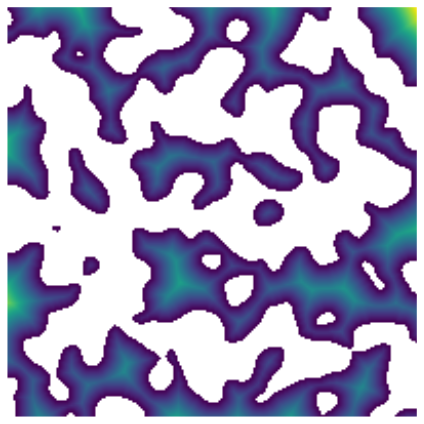

In [2]:
im = ps.generators.blobs(shape=[200, 200])
dt = edt(im)

plt.figure(figsize=[6, 6])
plt.imshow(dt/im)
plt.axis(False);

## `labels`
`snow_partitioning` can be used to create regions

0it [00:00, ?it/s]

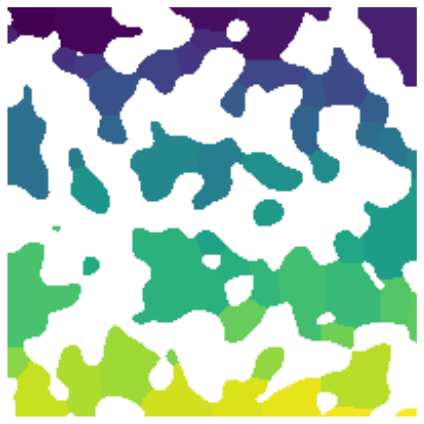

In [3]:
regions = ps.filters.snow_partitioning(im, r_max=4, sigma=0.4)
labels = regions.regions

plt.figure(figsize=[6, 6])
plt.imshow(labels/im)
plt.axis(False);

## `mode`
Various functions in `scipy.ndimage.measurements` are called to perform statistical calculation. The mode indicates which function to call.

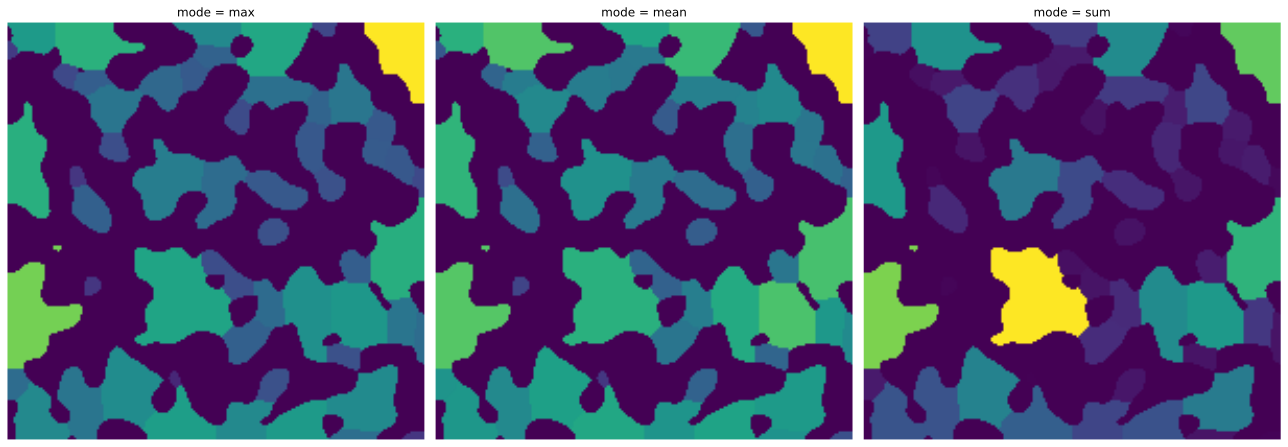

In [4]:
x1 = ps.filters.flood(im=dt, labels=labels, mode='max')
x2 = ps.filters.flood(im=dt, labels=labels, mode='mean')
x3 = ps.filters.flood(im=dt, labels=labels, mode='sum')

fig, ax = plt.subplots(1, 3, figsize=[18, 18])
ax[0].imshow(x1)
ax[0].axis(False)
ax[0].set_title('mode = max')
ax[1].imshow(x2)
ax[1].axis(False)
ax[1].set_title('mode = mean')
ax[2].imshow(x3)
ax[2].axis(False)
ax[2].set_title('mode = sum');